## 1. Project Title¶ Detecting Destruction and Damage to Historical Sites in the Ukraine after 2022 Russian Invasion


Title: Detecting attacks on historical sites in the Ukraine during the 2022 Russian invasion.

By Anjali Narayanan, Cate Pollock, and Michael Hatch

## 2. Question(s) you addressed, why it is important¶

What historical sites were damaged in the Ukraine in 2022 as a result of the Russina invasion? 
What caused this? 
Were they the result of war, and were these sites targeted deliberately?
Why is this important?

"All aggressive acts have one thing in common: they justify forceful resistance, and force cannot be used between nations, as it often can between persons, without putting life itself at risk. Whatever limits we place on the means and range of warfare, fighting a limited war is not like hitting somebody. Aggression opens the gates of hell."

Walzer, Michael. Just and Unjust Wars (p. 52). Basic Books. Kindle Edition.

Why is this important? The destruction of the physical religious and cultural inheritance of a people violates the rightfull intangible endowment. It is the stealing of a soul.

Russia invaded the Ukraine on February 24th, 2022, suprising political experts, political leaders, Russia's own armed forces, and putting the sovereignty of the Ukrainian state and the lives of its people in jeopardy while initiating largest military conflict in Europe since World War Two. Russia failed to achieve the capture of Kyiv and the capitulation of Ukraine as planned in the first few days, and in a few weeks were pushed out of the north. Battalian Tactical Groups (BTG's) which form the backbone of ground forces proved incapable of achieving their objective of capturing cities intact. Failing to engage and rout Ukrainian defenders in open battle or short ranges, Russian BTG's instead advanced by attacking from a distance with overwhelming artillery and missile attacks. In traditionally defender-friendly population centers, violating of the Law of War, Russia began targeting cities including residential centers. Cultural sites have been destroyed in these areas.

When special protection is not afforded to the places people live, worship, and learn as the Law of War requires, the destruction of cultural heritage sites follows. Knowing the times and places of these crimes helps make a case attributing those irreplacable losses at all levels. From the decision to go to war at the top, down to specific kinetic heat events on the ground, the insights we're seeking can help us better understand the narrative which will, ultimately, codify the meanings of these sacred sites as they will later be re-christened, or tragically, newly created to remind future Ukranians and Russians what happened in our time. 

NASA's VIIRS imagery provides a vector file of points of thermal events at three hour intervals. Like following brushfires, we can track the location of battles and intensity of firepower employed by analyzing this data. While other heat sources like campfires, smelting operations, or power plants can also leave a thermal imprint, applying contextual insights and GIS analysis, we can parse useful thermal events. These events are labeled by data and location, and given a 300 meter buffer to define a zone inclusive of a variety of ordinace types. Damage assessments can then be checked against these intersections of time, space, fire and heritage to give us the ability to discover, describe, and designate the events and those who caused them.

With this data we hope in the future to train a machine learning program which will make these determinations connecting heat to damage automatically. Tools such as these can not only make finding and blaming war criminals for past atrocities easier, cheaper, and more efficient, but by their existence deter similar aggression in the future. 

## 3. Background and literature

Inspired by a suggestion from Prof. Ilya Zaslavsky, and applying technology previously used for brush fire management, and more recently for studying other conflicts.

The context is that of major historical events happening right now; that of the Russian invasion of Ukraine on February 24th. The larger historical context is the settling of the post-cold-war world order, the salience of a rules-based international system to the actions of nation-states, the impact of this war on the Ukrainian people, and the long history of atricities and the documentation of those events created to make commiting them in secrecy more difficult.

## 4. Python libraries or ArcGIS modules you used and why¶

The purpose of this project is to determine if historic churches, castles, tombs, or other buildings within the national borders of the Ukraine designated 'historical' in the Open Street Map database were within damage range as a result of combat, targeted attack, or fire after the beginning of the Russian invasion in February 2022. Our program uses VIIRS infrared heat data, and applies a buffer to the instances of detected heat events. When that buffer intersects with the point location of a historical site, we label that a likely event of historical site damage. Using this, we apply a machine learning program to attempt to predict if an historical site has been damaged or destroyed. 

Notable Modules Used:

Numby for algrebra

Pandas for data processing and CSV I/O

Geopandas and Folium for geometries and mapping

Seaborn for data visualization

Matplotlib for visualization and plotting

Scikit-learn for splitting data sets, subsets, training, testing, asessing model performance, pre-processing, labeling and scaling

Folium for manipulation and visualization of data

In [1]:
#Importing required packages.

# pandas: data processing, CSV I/O
import pandas as pd

# geopandas, geometries, and mapping
import geopandas as gpd
import folium
from shapely.geometry import Point

# numpy, linear algebra package
import numpy as np

# seaborn, a statistical data visualization package
import seaborn as sns   #

# matplotlib, a visualization/plotting package
import matplotlib.pyplot as plt

# tools for assessing model performance from scikit-learn
from sklearn.metrics import confusion_matrix, classification_report

# preprocessing tools (labeling, scaling) from scikit-learn
from sklearn.preprocessing import StandardScaler, LabelEncoder

# routine for splitting datasets into train and test subsets
from sklearn.model_selection import train_test_split

# to plot charts in the notebook
%matplotlib inline
import matplotlib.patches as mpatches

# to extract zipfiles
import zipfile

import os
os.getcwd() #this tells you where you are and where your data comes from (if the notebook is in the same place as data)

'/home/cpollock/GPGN_490/FINAL_PROJECT'

## 5. Data sources

Our project data can be found at the following github repository: 
https://github.com/mihatch/GPGN_490

Or here on Google Drive: 
https://drive.google.com/drive/folders/1YeQKcfgZI7lbc-N0IUMIts78d72kvuVd?usp=sharing


It includes: 

#### 1. NASA VIIRS composite map w/ roughly 3-hour refresh: 
https://www.earthdata.nasa.gov/learn/find-data/near-real-time/firms/viirs-i-band-375-m-active-fire-data
detailed information on the VIIRS algorythm can be found here: https://viirsland.gsfc.nasa.gov/PDF/VIIRS_activefire_User_Guide.pdf

Nasa Visible Infrared Imaging Radiometer Suite (VIIRS) detects insdtances of heat at a resolution of 375 meters. It is an aggregate of multiple satellites, and indidates temperature based on brightness, measured in Kelvin. COnfidence is measures in low, medium, and high nominal categories. Confidence of the presence of fire is determined by NASA by an automated process dependent on the convergence of 4 separate brightnes detectors, and an algorythm distinguishing against background temperature, and correcting for other potential confounders.


#### 2. Open Street Map data for locations across Ukraine which are designated 'historical' in the 'churches', 'castles', 'tombs', and 'buildings' categories.

OpenStreetMap is a crowdsourced platform which conforms inputs to an existing taxonomy of objects, and keys which can describe attributes across these object classes. For example, under the category "historic" is nested "church", "tomb", and "building", so a user can create a specific search as follows to find historic tombs:

results = processing.run("quickosm:buildqueryextent", 
                        {"KEY":"historic", 
                         "VALUE":"tomb",
                         "EXTENT":extent})

https://www.openstreetmap.org/

Using OSM code we've included in our package, the dataset we use can be regularly and automatically updated for churches, tombs, schools, and any other buildings classified by users as "historical". This is critical to ongoing measurement of violations updating on a 3-hour basis, providing evidence of what's happened, and demonstrating to potential future violators that these events will be recorded and remembered.

#### 3. Ukraine national boundary data and GeoJSON of the same were sourced here: 
https://geodata.lib.utexas.edu/?f%5Bdc_format_s%5D%5B%5D=Shapefile&f%5Bdct_spatial_sm%5D%5B%5D=Ukraine&f%5Blayer_geom_type_s%5D%5B%5D=Polygon&per_page=100&sort=score+desc%2C+dc_title_sort+asc



In [2]:
#Import fire data 

data_location = "/home/cpollock/GPGN_490/FINAL_PROJECT/" # location of data  

with zipfile.ZipFile(data_location + "DL_FIRE_J1V-C2_272017.zip", 'r') as zip_ref: #extracting from zip file
    zip_ref.extractall(data_location + "J1_FIRMS")
    
fire_data = gpd.read_file(data_location + "J1_FIRMS/" + "fire_nrt_J1V-C2_272017.shp") #read the shapefile

## 6. Data cleaning you have done
We corrected CRS on all data to EPSG:8367, and clipped to Ukraine ROI. We also filtered VIIRS data to include only events that took place after the Russian invasion of Ukraine.

In [3]:
#Filter dataset by date, beginning on the Russian invasion February 24, 2022

fire_data = fire_data.loc[(fire_data['ACQ_DATE'] >= '2022-02-24')]
fire_data

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,geometry
1895,47.87256,33.44360,328.81,0.69,0.74,2022-02-24,0113,1,VIIRS,n,2.0NRT,270.95,5.46,N,POINT (33.44360 47.87256)
1896,47.87239,33.38744,314.72,0.68,0.74,2022-02-24,0113,1,VIIRS,n,2.0NRT,274.00,4.38,N,POINT (33.38744 47.87239)
1897,47.86631,33.42485,318.91,0.69,0.74,2022-02-24,0113,1,VIIRS,n,2.0NRT,271.51,5.53,N,POINT (33.42485 47.86631)
1898,47.86940,33.38816,302.86,0.68,0.74,2022-02-24,0113,1,VIIRS,n,2.0NRT,272.16,1.67,N,POINT (33.38816 47.86940)
1899,47.87239,33.45075,306.14,0.69,0.74,2022-02-24,0113,1,VIIRS,n,2.0NRT,268.87,3.01,N,POINT (33.45075 47.87239)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27660,50.85248,31.85378,343.64,0.39,0.44,2022-05-20,1106,1,VIIRS,n,2.0NRT,287.33,3.81,D,POINT (31.85378 50.85248)
27661,50.07800,36.60877,347.43,0.61,0.53,2022-05-20,1106,1,VIIRS,n,2.0NRT,300.15,17.45,D,POINT (36.60877 50.07800)
27662,49.40549,37.03274,344.58,0.63,0.54,2022-05-20,1106,1,VIIRS,n,2.0NRT,296.02,12.63,D,POINT (37.03274 49.40549)
27663,48.61510,38.34703,326.13,0.36,0.57,2022-05-20,1106,1,VIIRS,n,2.0NRT,294.88,2.30,D,POINT (38.34703 48.61510)


Text(0.5, 1.0, 'Fire Brightness since February 24')

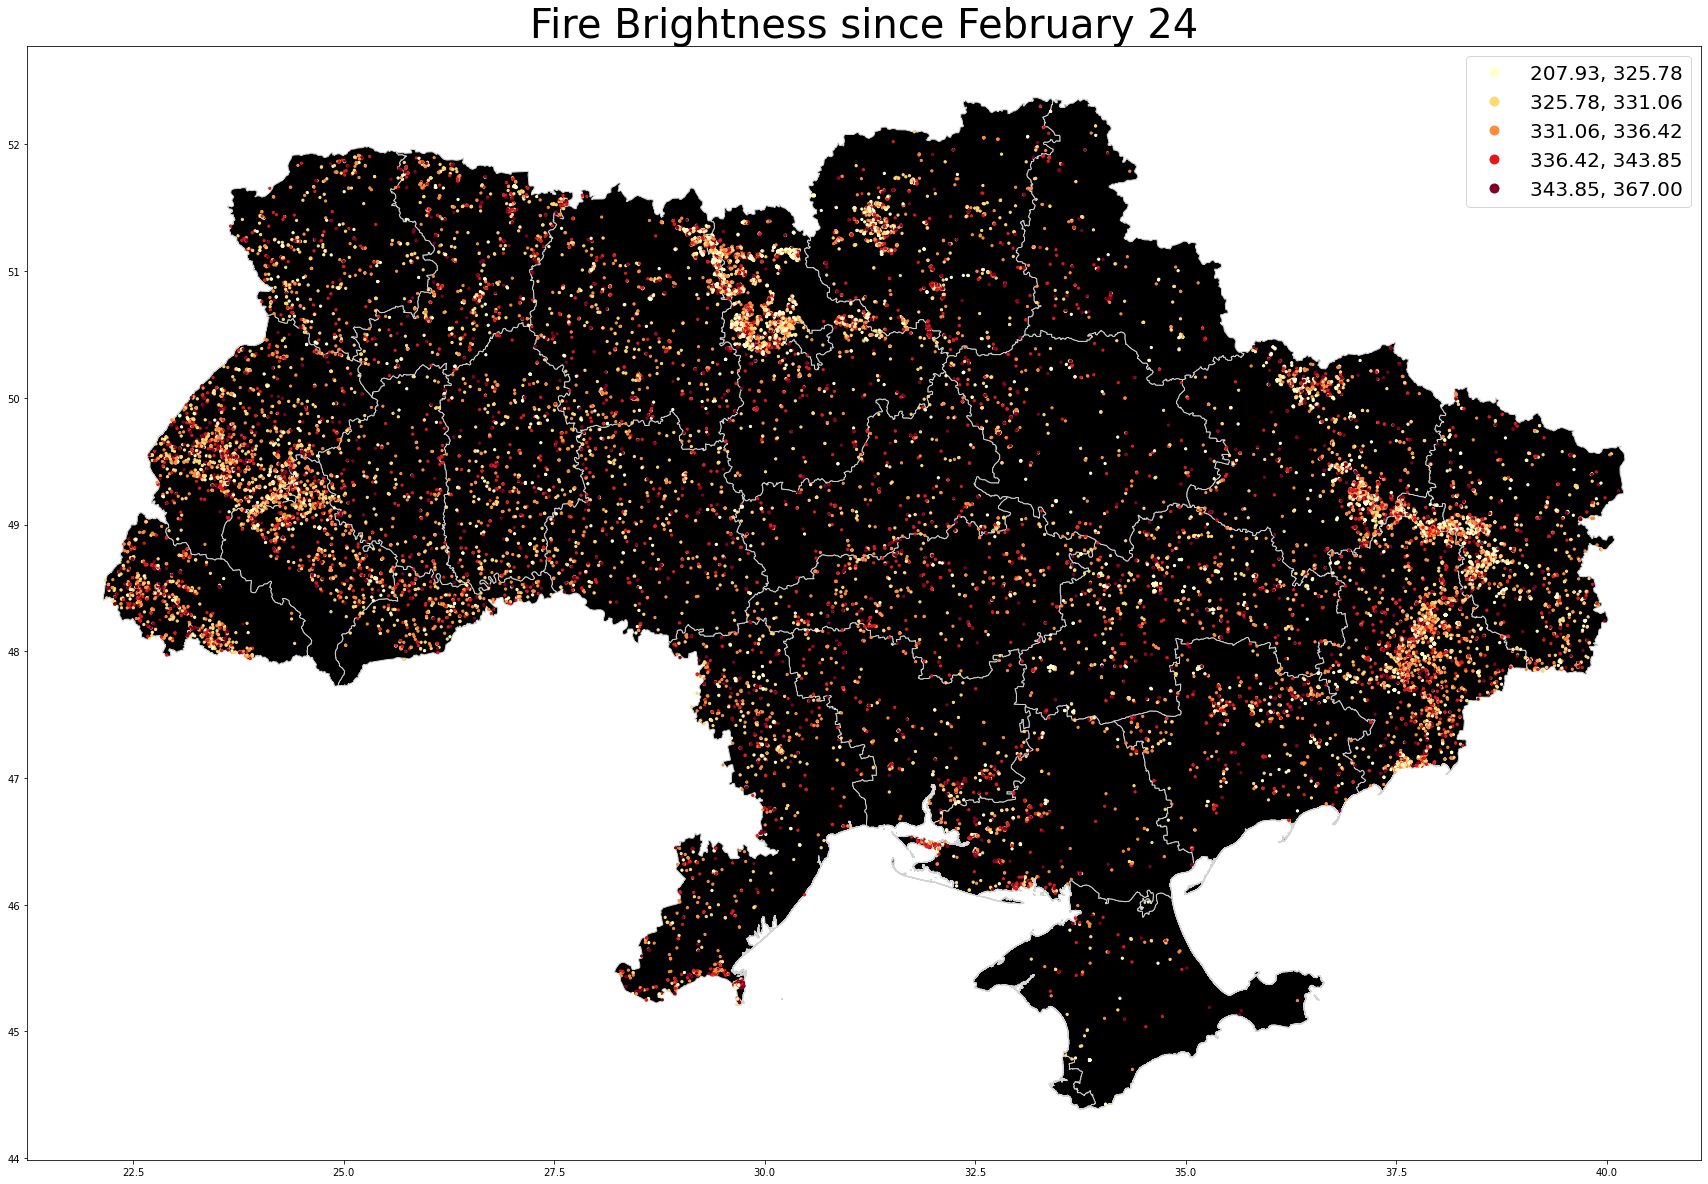

In [4]:
#Import Ukraine borders 

with zipfile.ZipFile(data_location + "Ukraine_First-level_Admin_Bds_2015.zip", 'r') as zip_ref: #extraction for shapefile of Ukraine
    zip_ref.extractall(data_location + "Ukraine_First-level_Admin_Bds_2015")

ukraine_shp = gpd.read_file(data_location + "Ukraine_First-level_Admin_Bds_2015/" + "gg870xt4706.shp")

ax = ukraine_shp.plot(color="black", edgecolor="lightgrey", figsize=(30,30))

#plot fire data by brightness
fire_data.plot(column="BRIGHTNESS", 
               ax=ax,
               cmap='YlOrRd', 
               scheme='quantiles', 
               markersize=5, 
               figsize=(30,30),
               legend=True,
               legend_kwds={'fontsize':20}
              ).set_title('Fire Brightness since February 24', fontsize = 40) 

In [5]:
ukraine_roi = ukraine_shp
ukraine_roi = ukraine_roi.set_crs(4326,allow_override=True) # allowoverride in case there is already a crs set
ukraine_roi = ukraine_roi.to_crs(6387) #this is a CRS for east Ukraine (for region longitude of ~37-40 degrees E)
fire_data_roi = fire_data.set_crs(4326,allow_override=True) #change fire data to same CRS
fire_data_roi = fire_data.to_crs(6387)

fire_data_roi = fire_data_roi.clip(ukraine_roi) #clip fire data to within our ROI (could probably do intersect too)

fire_data_roi["BRIGHTNESS"].max()
print(fire_data_roi["BRIGHTNESS"]/fire_data_roi["BRIGHTNESS"].max())

19772    0.811635
21700    0.821717
19712    0.808392
27404    0.813188
27542    0.841335
           ...   
15233    0.900790
2587     0.893406
2593     0.901362
15261    0.889210
15263    0.902670
Name: BRIGHTNESS, Length: 25667, dtype: float64


In [6]:
m = folium.Map(location=[49.583188, 31.106129],zoom_start=5.5, tiles="Stamen Toner", control_scale=True, 
               width='80%', height='83%')

from folium import plugins

fire_data_roi_heatmap = fire_data_roi
fire_data_roi_heatmap = fire_data_roi_heatmap.set_crs(6387)
fire_data_roi_heatmap = fire_data_roi_heatmap.to_crs(4326)

# Get x and y coordinates for each point
fire_data_roi_heatmap["x"] = fire_data_roi_heatmap["geometry"].x
fire_data_roi_heatmap["y"] = fire_data_roi_heatmap["geometry"].y
fire_data_roi_heatmap["w"] = fire_data_roi_heatmap["BRIGHTNESS"]
fire_data_roi["BRIGHTNESS_RATIO"] = fire_data_roi["BRIGHTNESS"]/fire_data_roi["BRIGHTNESS"].max()

fire_heatmap_data = fire_data_roi[['LATITUDE','LONGITUDE','BRIGHTNESS_RATIO']]
fire_heatmap_data = fire_heatmap_data.values.tolist()

m.add_children(plugins.HeatMap(fire_heatmap_data,
                               gradient={0.55:"navy",0.6:"blue",0.65:"teal",
                                        0.7:"green",0.75:"lime",0.8:"yellow",
                                        0.85:"orange",0.9:"red",1:"darkred"},
                               radius=12))

#Below is a heat map of fire events in Ukraine since the start of the conflict. Notice that the areas 
#are more clearly defined and delineated after zooming

In [7]:
with zipfile.ZipFile(data_location + "hist_sites.zip", 'r') as zip_ref: #extraction for shapefile of cultural sites
    zip_ref.extractall(data_location + "hist_sites")

hist_shp = gpd.read_file(data_location + "/hist_sites" + "/all_sites.shp") #read the shapefile

ukraine_shp = ukraine_shp.set_crs(4326)
ukraine_shp = ukraine_shp.to_crs(6387)

hist_shp = hist_shp.set_crs(4326)
hist_shp = hist_shp.to_crs(6387)

hist_shp_roi = hist_shp.clip(ukraine_shp) #clip historical data to within our ROI 

## 7. Descriptive Statistics

Plotting and polishing with interactive folium map. 

    A. Adding historical sites

    B. Plotting FIre Data

    C. Buffering FIre Data
    
    D. Displaying Map


In [8]:
hist_shp_roi = hist_shp_roi[['osm_way_id','xcoord', 'ycoord', 'layer', 'path', 'geometry']]

In [10]:
hist_shp_roi = hist_shp_roi.to_crs(6387) #change crs to one that uses metres for buffer creation 
hist_shp_roi_buffer = hist_shp_roi.geometry.buffer(300)
hist_shp_roi_buffer = hist_shp_roi_buffer.set_crs(6387)
hist_shp_roi_buffer = hist_shp_roi_buffer.to_crs(4326) #convert crs back to one used by all layers

# determine if a fire data point is within the buffer of the historical site: 
dissolved_hist_buffers = hist_shp_roi_buffer.unary_union #dissolve buffers

In [11]:
hist_shp_roi["firedata"] = fire_data["geometry"].contains(dissolved_hist_buffers) 
hist_shp_roi.fillna('True', inplace=True)
# !!! NOTE: Even if the map doesn't output, we should still have information on if the sites are affected by fires !!!
#determine if the fire data contains the buffer (I tried it the other way around, and it doesn't work - can look into it)
hist_shp_roi

,osm_way_id,xcoord,ycoord,layer,path,geometry,firedata
1729,887700865,29.264281,45.438720,building,"Point?crs=EPSG:4326&field=osm_id:string(0,0)&f...",POINT (-461576.096 5080130.944),True
2884,311169016,25.723557,48.158445,church,"Point?crs=EPSG:4326&field=osm_id:string(0,0)&f...",POINT (-686577.770 5422039.000),False
2726,32202686,25.936250,48.294500,church,"Point?crs=EPSG:4326&field=osm_id:string(0,0)&f...",POINT (-668195.775 5434368.767),False
2160,144901498,25.734374,48.636699,castle,"Point?crs=EPSG:4326&field=osm_id:string(0,0)&f...",POINT (-676432.690 5474891.710),False
2930,382681733,25.985758,48.789736,church,"Point?crs=EPSG:4326&field=osm_id:string(0,0)&f...",POINT (-655027.916 5488613.418),False
...,...,...,...,...,...,...,...
1903,1035966248,30.013839,51.009606,building,"Point?crs=EPSG:4326&field=osm_id:string(0,0)&f...",POINT (-330023.768 5691803.703),False
2479,370602080,34.907472,51.072588,castle,"Point?crs=EPSG:4326&field=osm_id:string(0,0)&f...",POINT (13322.272 5668234.914),False
2478,370602079,34.907530,51.073205,castle,"Point?crs=EPSG:4326&field=osm_id:string(0,0)&f...",POINT (13330.190 5668303.353),False
1512,648259233,34.785488,51.082683,building,"Point?crs=EPSG:4326&field=osm_id:string(0,0)&f...",POINT (4841.726 5669840.067),True


Text(0.5, 1.0, 'Cultural sites that may have been damaged')

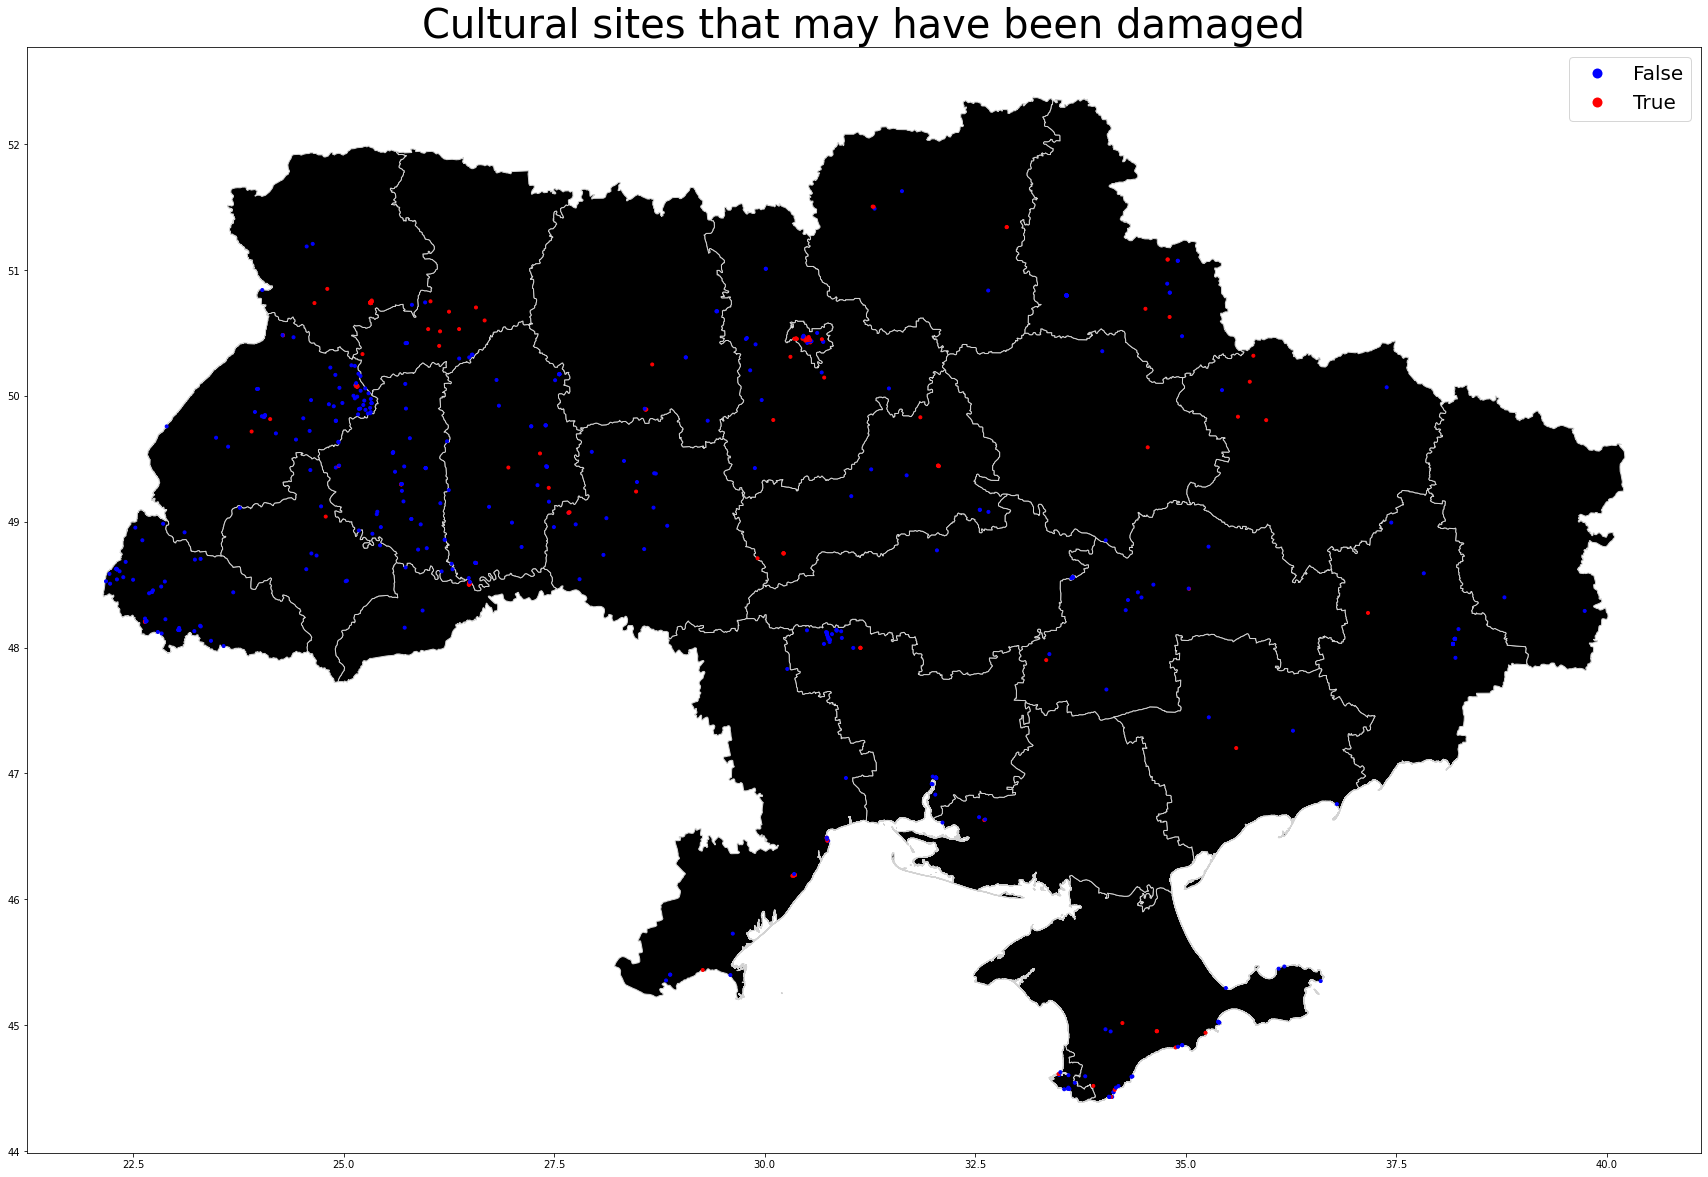

In [12]:
#plot cultural sites within damage range
ukraine_shp = gpd.read_file(data_location + "Ukraine_First-level_Admin_Bds_2015/" + "gg870xt4706.shp")
ukraine_shp = ukraine_shp.to_crs(4326)
hist_shp_roi = hist_shp_roi.to_crs(4326)

ax = ukraine_shp.plot(color="black", edgecolor="lightgrey", figsize=(30,30))

hist_shp_roi.plot(column="firedata", 
                  ax=ax,  
                  cmap='bwr', 
                  markersize=9, 
                  figsize=(30,30),
                  legend=True,
                  legend_kwds={'fontsize':20}).set_title('Cultural sites that may have been damaged', fontsize = 40)

In [13]:
#list coordinates of damaged cultural sites
damaged_sites = hist_shp_roi.loc[hist_shp_roi['firedata'] == 'True']
damaged_sites = damaged_sites[['osm_way_id', 'xcoord', 'ycoord', 'layer']]
damaged_sites.rename(columns={"layer": "site_type"})
damaged_sites

,osm_way_id,xcoord,ycoord,layer
1729,887700865,29.264281,45.438720,building
430,134633699,26.955377,49.430509,building
1587,718213838,27.669657,49.071483,building
1853,991577068,27.672515,49.073359,building
1591,742352602,27.682214,49.075260,building
...,...,...,...,...
1617,773137154,32.876821,51.341019,building
603,181513792,31.294260,51.502301,building
1430,525189180,31.282732,51.503473,building
1512,648259233,34.785488,51.082683,building


Text(0.5, 1.0, 'Cultural sites in Kiev City that may have been damaged')

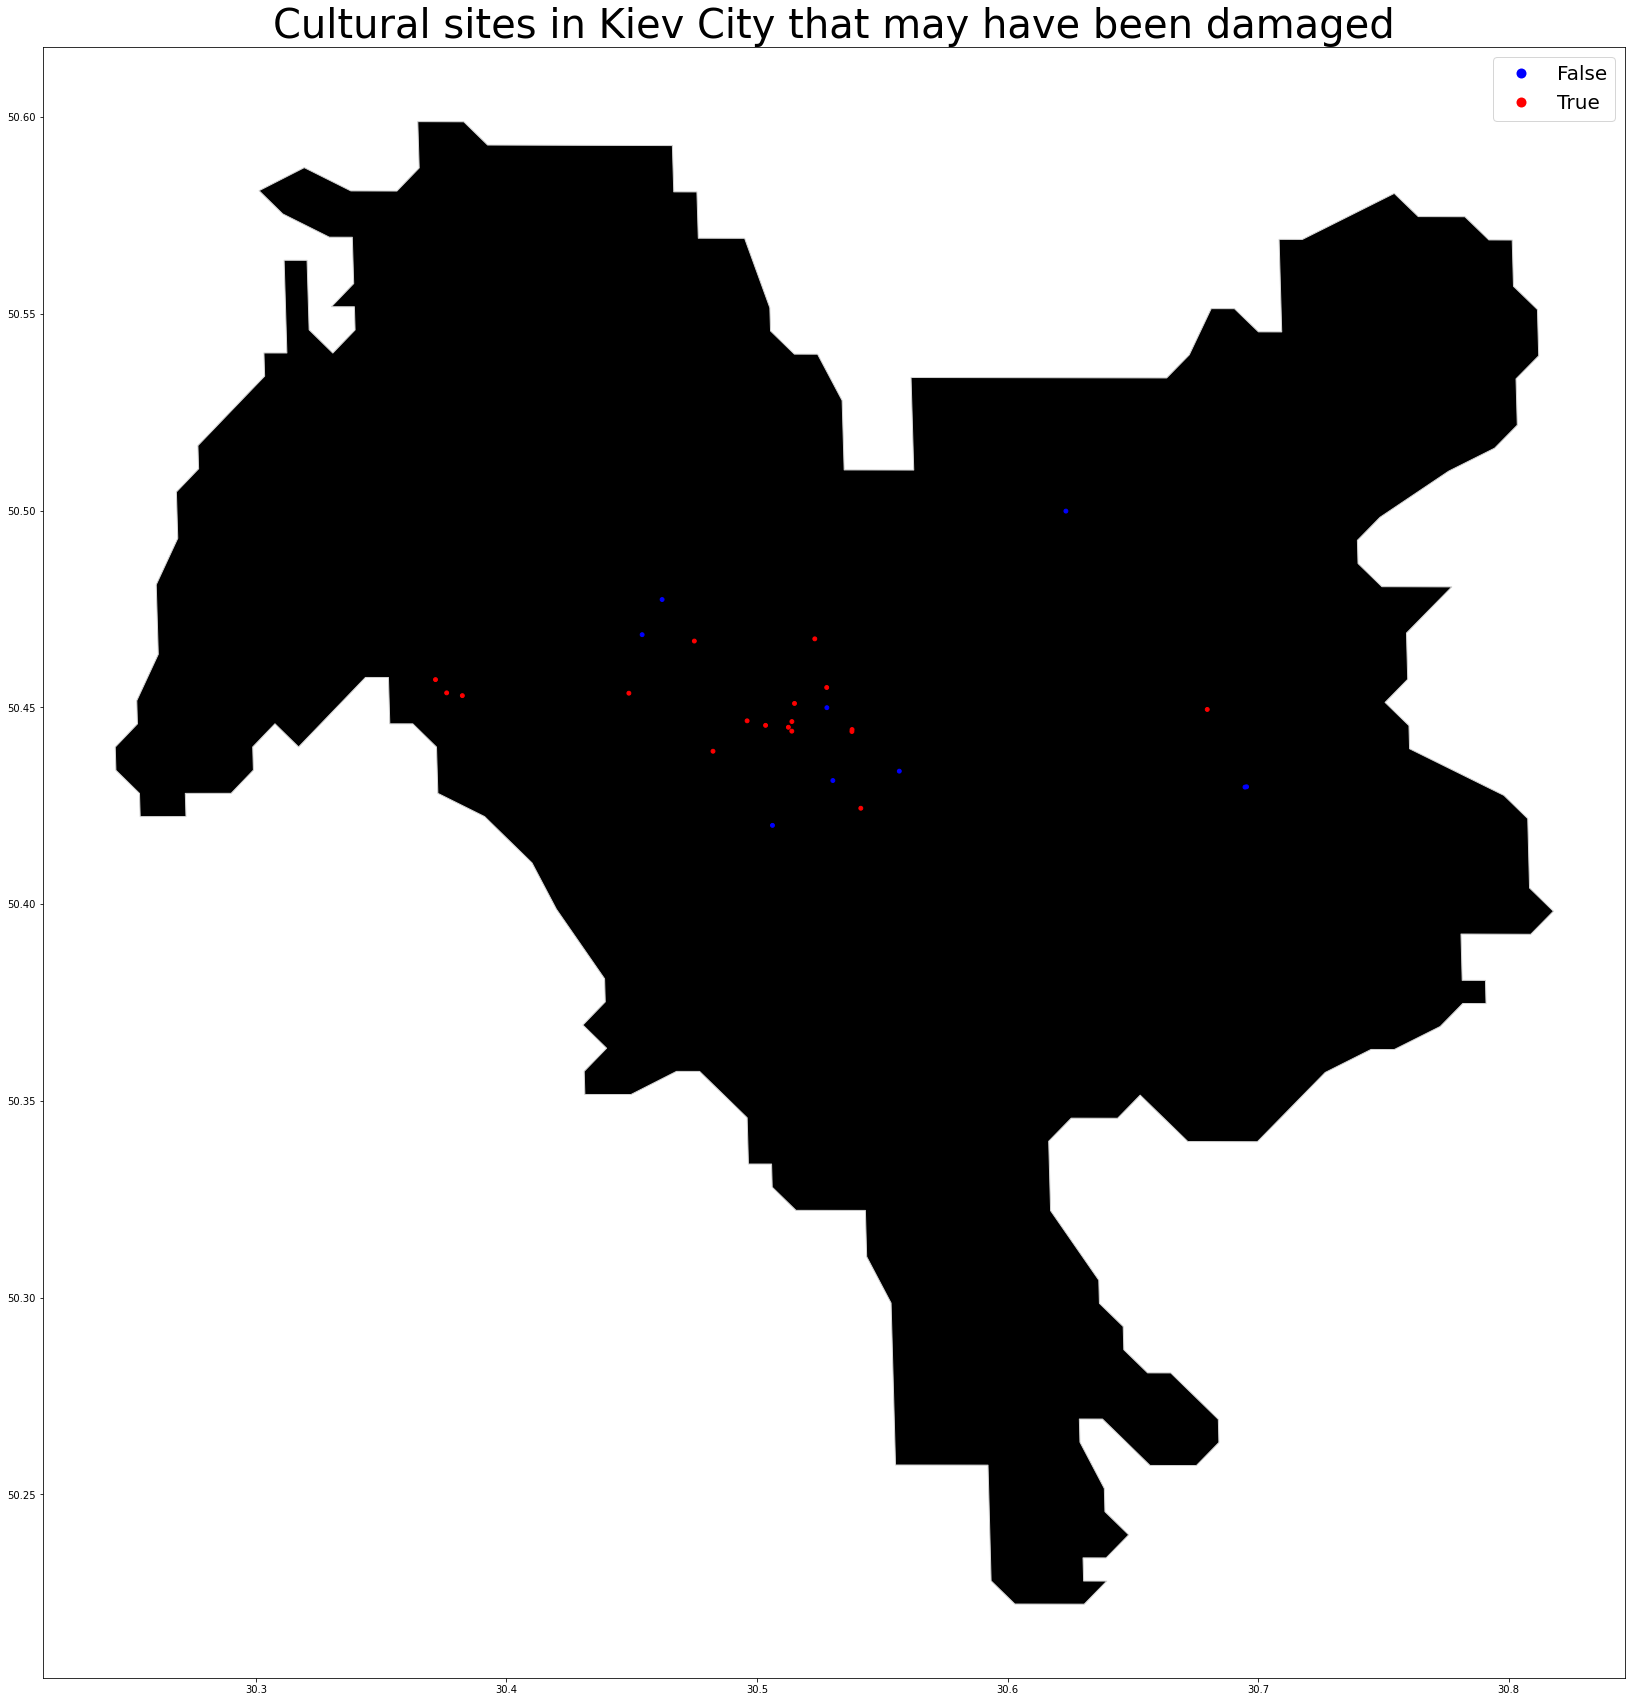

In [14]:
with zipfile.ZipFile(data_location + "Ukraine_First-level_Admin_Bds_2015.zip", 'r') as zip_ref: #extraction for shapefile of Ukraine
    zip_ref.extractall(data_location + "Ukraine_First-level_Admin_Bds_2015")

ukraine_shp = gpd.read_file(data_location + "Ukraine_First-level_Admin_Bds_2015/" + "gg870xt4706.shp")
kiev_roi = ukraine_shp[(ukraine_shp["hasc_1"]=="UA.KC")]
damage_kiev = hist_shp_roi.clip(kiev_roi)
ax = kiev_roi.plot(color="black", edgecolor="lightgrey", figsize=(30,30))
damage_kiev.plot(ax=ax,
                 column="firedata", 
                 cmap='bwr', 
                 markersize=15, 
                 figsize=(30,30),
                 legend=True, 
                 legend_kwds={'fontsize':20}).set_title('Cultural sites in Kiev City that may have been damaged', fontsize = 40)

## 8. Summary of products and results¶

We've built the foundation of future automation potential via the following products. First, a sample dataset of historical locations. Second, a process to buffer VIIRS data. Third, identifying when historical sites fall within the fluid, but aggregated buffer of thermal events during the time of this conflict. 

We found that 251 of 637 sites fell within 350 metes of confirmed fire events during the time period we studied. 39.4% of all sites were at the very least endangered, or at worst, destroyed.


## 9. Analysis & Discussion

After cross-checking intersections of VIIRS heat events and their 350 meter buffers against the 637 historical sites identified in the OpenStreetMap search, we found that in the time period after the February 24th, 2022 Russian invasion of Ukraine, 251 historical buildings were threatened by fire events. This means that of our 637-site sample across Ukraine, fully 39% of these important places of learning, worship, burial, and the like were placed at risk by fire. This is a staggering fraction considerring that by standards of the law of war, these places should be sacrosanct (sources from many international conventions over centuries can be found here: https://ihl-databases.icrc.org/customary-ihl/eng/docs/v2_rul_rule38). 

After years of allied bombardment and ground combat across Germany in World War Two, damage to buildings in cities ranged from 65% damaged in Dortmund, 54% in Hamburg, and 33% in Munich and Stuttgart. (Source: Diefendorf, J. M. (1993). In the wake of war: the reconstruction of German cities after World War I) By comparison, A figure of 39% for all historical sites in Ukraine after only three months, considering that most fighting was limited to the east and Kyiv gives us a window into the true degree of residential extremis.

Distribution of historical sites roughly corresponds to population density, and as can be seen above, Kyiv reflects this pattern closely. How do we explain such a high rate of endangerment of historical sites? 

One possibility is that the concentration of fighting in cities puts far more structures within the aggregated 350m fire buffers, and might effectively wrap an entire city in large part within the "danger zone" of our buffer. In theory, a very small number of fire events could effectively subsume all settlements and structures in urban areas. In other words, many small fires distributed 600m apart in a grid, with one occuring per day, could look the same as a measuement of Dreseden or Tokyo on their respective single worst nights of apocalyptic firestorm destruction in 1945. This may muddle our data, and future research may benefit from running many versions of this study at a variety of buffer sizes and time horizons. 

Another explanation is that historical sites are being deliberately targeted. This would be consistent with historical patterns of violating the Laws of War in Crimea and Chechnya by Russian armed forces, and with the general idea underlying Putin's Casus Belli: that Ukraine is not a historically sovereign and independent people, and thus not rightfully independent. Targeting culturally important locations helps wipe-away those unique historical roots.

Lastly, the change in Russian tactics from shock-and-awe blitzkrieg aimed at capture valuable Ukranian cities intact, to the slow slog of scorched earch destruction, combined with the natural defensive advantage in cities leading to more intense fighting there of all kinds, means that the general intensity of combat would also correlate to population density, which in-turn corresponds to concentrations of important historical sites. In opther words, thinking of the buildings themselves as having 350m buffers, this similarly subsumes entire urban areas as with the fires. 

## 10. Conclusions and future work¶

For future study, creating an automated tool for accessing the data at regular intervals can help keep this up to date, creating an invaluable databas for historians, evidence of war crimes tribunal prosecutions, and collaboration between the public, OSINT aggregators, and journalists on the near-term to have beter day-to-day picture of the situation on the ground. Automation down to the 3-hour timescale (based on the limitation of VIIRS thermal data) could potentially call attention to events as they threaten cultural heritage sites, alerting stakeholders of destruction which is imminent, or underway. This would have pragmatic informational benefits for soldiers, firefighters, priests, facility custodians or others with deep connections to, or vested interests in these sites.

Additionally, replacing our current OpenStreetMap data containing 637 historical sites with the larger 26,000-entry collection of "cultural heritage" locations identified by the joint efforts of the Center Heritage Monitoring Lab (CHML) and the Smithsonian Cultural Rescue Initiative (SCRI) would provide a more authoritative and thorough listing. More can be learned about CHML here: https://www.vmnh.net/research-collections/chml. 

A one-page summary of the CHML/SCRI project can be accesed here: https://www.vmnh.net/content/vmnh/uploads/PDFs/research_and_collections/chml/22-0407_ukrainian_cultural_heritage_potential_impact_summary_final2.pdf

In conclusion, we are seeing an assault on the more than just the measurable property, industry, and lives which can be seen 'on paper', but tragically also the very identity and legacy of a people are now under threat at a scale possibly approaching that of Germany and Japan after world War Two, and in a terrifying short time span. Documentation is one of our most powerful tools to fight these atrocities by cutting through the opacity of autocratic belligerence.